# Extract - Cleaning Data

In [812]:
from bs4 import BeautifulSoup
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import requests
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

### CSV Project Data 

In [813]:
project_data = pd.read_csv("ekstrakdata/projects_data.csv", dtype={44: str})
project_data.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN


In [814]:
#overview the data
project_data.dtypes

id                           object
regionname                   object
countryname                  object
prodline                     object
lendinginstr                 object
lendinginstrtype             object
envassesmentcategorycode     object
supplementprojectflg         object
productlinetype              object
projectstatusdisplay         object
status                       object
project_name                 object
boardapprovaldate            object
board_approval_month         object
closingdate                  object
lendprojectcost              object
ibrdcommamt                  object
idacommamt                   object
totalamt                     object
grantamt                     object
borrower                     object
impagency                    object
url                          object
projectdoc                  float64
majorsector_percent         float64
sector1                      object
sector2                      object
sector3                     

In [815]:
# convert data type to datetime 
project_data['boardapprovaldate'] = pd.to_datetime(project_data['boardapprovaldate'])
project_data['closingdate'] = pd.to_datetime(project_data['closingdate'])

# convert data type to float
float_cols = ['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']
project_data[float_cols] = project_data[float_cols].replace('[\$,]', '', regex=True).astype(float)

# check the data type
project_data.dtypes

<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11276\3740407593.py:7: SyntaxWarning: invalid escape sequence '\$'
  project_data[float_cols] = project_data[float_cols].replace('[\$,]', '', regex=True).astype(float)


id                                       object
regionname                               object
countryname                              object
prodline                                 object
lendinginstr                             object
lendinginstrtype                         object
envassesmentcategorycode                 object
supplementprojectflg                     object
productlinetype                          object
projectstatusdisplay                     object
status                                   object
project_name                             object
boardapprovaldate           datetime64[ns, UTC]
board_approval_month                     object
closingdate                 datetime64[ns, UTC]
lendprojectcost                         float64
ibrdcommamt                             float64
idacommamt                              float64
totalamt                                float64
grantamt                                float64
borrower                                

In [816]:
#check missing values
project_data.isnull().sum()

id                              0
regionname                      0
countryname                     0
prodline                        0
lendinginstr                  246
lendinginstrtype              246
envassesmentcategorycode     5811
supplementprojectflg           53
productlinetype                 0
projectstatusdisplay            4
status                          4
project_name                    0
boardapprovaldate            1504
board_approval_month         1504
closingdate                  3349
lendprojectcost               125
ibrdcommamt                     0
idacommamt                      0
totalamt                        0
grantamt                        0
borrower                     5919
impagency                    6097
url                             0
projectdoc                  18248
majorsector_percent         18248
sector1                         0
sector2                      8721
sector3                     11761
sector4                     13872
sector5       

In [817]:
#check missing values in percentage
missing_values = project_data.isnull().mean()*100
missing_values

id                            0.000000
regionname                    0.000000
countryname                   0.000000
prodline                      0.000000
lendinginstr                  1.348093
lendinginstrtype              1.348093
envassesmentcategorycode     31.844586
supplementprojectflg          0.290443
productlinetype               0.000000
projectstatusdisplay          0.021920
status                        0.021920
project_name                  0.000000
boardapprovaldate             8.241999
board_approval_month          8.241999
closingdate                  18.352696
lendprojectcost               0.685007
ibrdcommamt                   0.000000
idacommamt                    0.000000
totalamt                      0.000000
grantamt                      0.000000
borrower                     32.436431
impagency                    33.411881
url                           0.000000
projectdoc                  100.000000
majorsector_percent         100.000000
sector1                  

In [818]:
#use delimiter to split string ; in column countryname maxsplit=1
project_data['countryname'] = project_data['countryname'].str.split(';', n=1).str[0]
project_data.head(10)

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN
5,P161483,Middle East and North Africa,Republic of Tunisia,PE,Development Policy Lending,AD,NaN,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,P161885,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,P162069,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,P163540,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,P163576,Middle East and North Africa,Lebanese Republic,PE,Program-for-Results,PR,NaN,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [819]:
#change !$!0 to 'NaN'
project_data = project_data.replace('!$!0', 'NaN')
project_data.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN


In [820]:
#use delimiter to change ; into , in columns missing values
project_data['GeoLocName'] = project_data['GeoLocName'].str.replace(';', ', ')
project_data['GeoLocID'] = project_data['GeoLocID'].str.replace(';', ', ')
project_data['Latitude'] = project_data['Latitude'].str.replace(';', ',')
project_data['Longitude'] = project_data['Longitude'].str.replace(';', ', ')
project_data['Country'] = project_data['Country'].str.replace(';', ', ')
project_data['sector'] = project_data['sector'].str.replace(';', ', ')
project_data['mjsector'] = project_data['mjsector'].str.replace(';', ', ')
project_data['location'] = project_data['location'].str.replace('!$!', ', ')
project_data['sector1'] = project_data['sector1'].str.replace('!$!', ', ')
project_data['theme1'] = project_data['theme1'].str.replace('!$!', ', ')

project_data.head(10)


,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,"0002327546, Ogun State, 7, 3.58333, NG;0002328...","0002327546, 0002328925, 0002565340, 0002565343...","Ogun State, Niger State, Abia State, Edo, Kebb...","7,10,5.41667,6.5,11.5,8","3.58333, 6, 7.5, 6, 4, 10.5","NG, NG, NG, NG, NG, NG",NaN
5,P161483,Middle East and North Africa,Republic of Tunisia,PE,Development Policy Lending,AD,NaN,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,P161885,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,P162069,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,P163540,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,P163576,Middle East and North Africa,Lebanese Republic,PE,Program-for-Results,PR,NaN,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [821]:
#drop missing values above 80%
project_data = project_data.dropna(thresh=0.8*len(project_data), axis=1)
project_data.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,status,...,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url,sector1,sector,mjsector,theme1
0,P162228,Other,World,RE,Investment Project Financing,IN,N,L,Active,Active,...,500000.0,0.0,0.0,0.0,500000.0,http://projects.worldbank.org/P162228?lang=en,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,N,L,Active,Active,...,200000000.0,0.0,200000000.0,200000000.0,0.0,http://projects.worldbank.org/P163962?lang=en,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,Y,L,Active,Active,...,50000000.0,0.0,58330000.0,58330000.0,0.0,http://projects.worldbank.org/P167672?lang=en,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,N,L,Active,Active,...,50000000.0,0.0,20000000.0,20000000.0,0.0,http://projects.worldbank.org/P158768?lang=en,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,N,L,Active,Active,...,100000000.0,0.0,100000000.0,100000000.0,0.0,http://projects.worldbank.org/P161364?lang=en,"Social Protection, 63, SA","Social Protection, Social Protection, Other In...","Social Protection, Social Protection, Industry...",NaN


In [822]:
project_data.isnull().sum()

id                         0
regionname                 0
countryname                0
prodline                   0
lendinginstr             246
lendinginstrtype         246
supplementprojectflg      53
productlinetype            0
projectstatusdisplay       4
status                     4
project_name               0
boardapprovaldate       1504
board_approval_month    1504
closingdate             3349
lendprojectcost          125
ibrdcommamt                0
idacommamt                 0
totalamt                   0
grantamt                   0
url                        0
sector1                    0
sector                   638
mjsector                 638
theme1                     0
dtype: int64

In [823]:
#handle the closingdate column missing values
project_data['closingdate'] = project_data['closingdate'].fillna(project_data['closingdate'].mean())
project_data['closingdate'] = project_data['closingdate'].dt.strftime('%Y-%m-%d')

project_data['boardapprovaldate'] = project_data['boardapprovaldate'].fillna(project_data['boardapprovaldate'].mean())
project_data['boardapprovaldate'] = project_data['boardapprovaldate'].dt.strftime('%Y-%m-%d')

#show data closingdate and boardapprovaldate after handling missing values
project_data[['closingdate', 'boardapprovaldate']]

,closingdate,boardapprovaldate
0,2002-01-26,2018-06-28
1,2023-12-31,2018-06-28
2,2002-01-26,2018-06-28
3,2023-06-28,2018-06-27
4,2023-05-31,2018-06-27
...,...,...
18243,1954-12-31,1948-03-25
18244,1949-03-31,1947-08-28
18245,1949-03-31,1947-08-22
18246,1948-06-30,1947-08-07


In [824]:
project_data.isnull().sum()

id                         0
regionname                 0
countryname                0
prodline                   0
lendinginstr             246
lendinginstrtype         246
supplementprojectflg      53
productlinetype            0
projectstatusdisplay       4
status                     4
project_name               0
boardapprovaldate          0
board_approval_month    1504
closingdate                0
lendprojectcost          125
ibrdcommamt                0
idacommamt                 0
totalamt                   0
grantamt                   0
url                        0
sector1                    0
sector                   638
mjsector                 638
theme1                     0
dtype: int64

In [825]:
# handle missing values in column 
project_data['status'] = project_data['status'].fillna(project_data['status'].mode()[0])
project_data['lendinginstr'] = project_data['lendinginstr'].fillna(project_data['lendinginstr'].mode()[0])
project_data['lendinginstrtype'] = project_data['lendinginstrtype'].fillna(project_data['lendinginstrtype'].mode()[0])
project_data['supplementprojectflg'] = project_data['supplementprojectflg'].fillna(project_data['supplementprojectflg'].mode()[0])
project_data['projectstatusdisplay'] = project_data['projectstatusdisplay'].fillna(project_data['projectstatusdisplay'].mode()[0])
project_data['board_approval_month'] = project_data['board_approval_month'].fillna(project_data['board_approval_month'].mode()[0])
project_data['lendprojectcost'] = project_data['lendprojectcost'].fillna(project_data['lendprojectcost'].mean())
project_data['sector'] = project_data['sector'].fillna(project_data['sector'].mode()[0])
project_data['mjsector'] = project_data['mjsector'].fillna(project_data['mjsector'].mode()[0])
project_data.isnull().sum()

id                      0
regionname              0
countryname             0
prodline                0
lendinginstr            0
lendinginstrtype        0
supplementprojectflg    0
productlinetype         0
projectstatusdisplay    0
status                  0
project_name            0
boardapprovaldate       0
board_approval_month    0
closingdate             0
lendprojectcost         0
ibrdcommamt             0
idacommamt              0
totalamt                0
grantamt                0
url                     0
sector1                 0
sector                  0
mjsector                0
theme1                  0
dtype: int64

In [826]:
#check duplicate data
project_data.duplicated().sum()

#show data that has duplicate
print("Data with duplicate values:")
project_data[project_data.duplicated()]

Data with duplicate values:


,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,status,...,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url,sector1,sector,mjsector,theme1


In [827]:
# export data to csv file and encoding utf-8
project_data.to_csv('datasets-cleaned/projects_data_cleaned.csv', index=False, encoding='utf-8')

### CSV Population Data

In [828]:
population_data = pd.read_csv("ekstrakdata/population_data.csv")
population_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [829]:
# check data types
population_data.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2014              float64
2015              float64
2016              float64
2017              float64
Unnamed: 62       float64
Length: 63, dtype: object

In [830]:
# drop columns 'unnamed: 62'
population_data = population_data.drop('Unnamed: 62', axis=1)
population_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [831]:
# check missing values
population_data.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 62, dtype: int64

In [832]:
# handle missing values 
population_data = population_data.dropna()
population_data.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2013              0
2014              0
2015              0
2016              0
2017              0
Length: 62, dtype: int64

In [833]:
# melt data population_data
population_data = pd.melt(population_data, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Population')
population_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54211.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8996351.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5643182.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1960,1608800.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,1960,13411.0


In [834]:
# drop columns 'Indicator Name' and 'Indicator Code'
population_data = population_data.drop(['Indicator Name', 'Indicator Code'], axis=1)
population_data.head()

,Country Name,Country Code,Year,Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0


In [835]:
# check duplicate values
population_data.duplicated().sum()

# show the data that has duplicate values
print("Data with duplicate values:")
population_data[population_data.duplicated()]

Data with duplicate values:


,Country Name,Country Code,Year,Population


In [836]:
# export data to csv file and encoding utf-8
population_data.to_csv('datasets-cleaned/population_data_cleaned.csv', index=False, encoding='utf-8')

### JSON Population Data

In [837]:
population_json = pd.read_json("ekstrakdata/population_data.json")
population_json.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [838]:
# check data type
population_json.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
Length: 62, dtype: object

In [839]:
# check data missing values
population_json.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 62, dtype: int64

In [840]:
# handle missing values
population_json = population_json.dropna()
population_json.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2013              0
2014              0
2015              0
2016              0
2017              0
Length: 62, dtype: int64

In [841]:
# melt data 'Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', var_name='Year', value_name='Population'
population_json = population_json.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Population')
population_json.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54211.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8996351.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5643182.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1960,1608800.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,1960,13411.0


In [842]:
# drop columns 'Indicator Name' and 'Indicator Code'
population_json = population_json.drop(['Indicator Name', 'Indicator Code'], axis=1)
population_json.head()

,Country Name,Country Code,Year,Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0


In [843]:
# check duplicate data
population_json.duplicated().sum()

# show the data that has duplicate values
print("Data with duplicate values:")
population_json[population_json.duplicated()]

Data with duplicate values:


,Country Name,Country Code,Year,Population


In [844]:
# export the cleaned data utf-8 encoding
population_json.to_csv('datasets-cleaned/population_data_json_cleaned.csv', index=False, encoding='utf-8')

### XML Population

In [845]:
# Read the XML file
with open("ekstrakdata/population_data.xml", "r") as f:
    xml_data = f.read()

# Parse XML using Beautiful Soup
soup = BeautifulSoup(xml_data, "html.parser")

# Extract data from XML and store in a list of dictionaries
data = []
for record in soup.find_all("record"):
    record_data = {}
    for field in record.find_all("field"):
        name = field.get("name")
        value = field.text
        record_data[name] = value
    data.append(record_data)

# Convert list of dictionaries into DataFrame
population_xml = pd.DataFrame(data)

print(population_xml.head())

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\html\parser.py:171: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


  Country or Area               Item  Year  Value
0           Aruba  Population, total  1960  54211
1           Aruba  Population, total  1961  55438
2           Aruba  Population, total  1962  56225
3           Aruba  Population, total  1963  56695
4           Aruba  Population, total  1964  57032


In [846]:
population_xml.rename(columns={'Country or Area': 'Country Name', 'Value': 'Population', 'Item': 'Indicator Name'}, inplace=True)
population_xml.head()

,Country Name,Indicator Name,Year,Population
0,Aruba,"Population, total",1960,54211
1,Aruba,"Population, total",1961,55438
2,Aruba,"Population, total",1962,56225
3,Aruba,"Population, total",1963,56695
4,Aruba,"Population, total",1964,57032


In [847]:
# drop 'Indicator Name' column
population_xml = population_xml.drop('Indicator Name', axis=1)
population_xml.head()

,Country Name,Year,Population
0,Aruba,1960,54211
1,Aruba,1961,55438
2,Aruba,1962,56225
3,Aruba,1963,56695
4,Aruba,1964,57032


In [848]:
# check data types
population_xml.dtypes

Country Name    object
Year            object
Population      object
dtype: object

In [849]:
# check missing values
population_xml.isnull().sum()

Country Name    0
Year            0
Population      0
dtype: int64

In [850]:
# check duplicate
population_xml.duplicated().sum()

# show the data that has duplicate values
print("Data with duplicate values:")
population_xml[population_xml.duplicated()]

Data with duplicate values:


,Country Name,Year,Population


In [851]:
# Export the cleaned data to XML
population_xml.to_csv('datasets-cleaned/population_data_xml_cleaned.csv', index=False, encoding='utf-8')

### DB Population

In [852]:
# Connect to SQLite database
conn = sqlite3.connect("ekstrakdata/population_data.db")
cursor = conn.cursor()

# Perform select query
query = "SELECT * FROM population_data"
cursor.execute(query)

# Fetch all results
results = cursor.fetchall()

pdb = pd.DataFrame(results)

print(pdb.head())

# Close connection
conn.close()

   0            1    2                  3            4          5          6   \
0   0        Aruba  ABW  Population, total  SP.POP.TOTL    54211.0    55438.0   
1   1  Afghanistan  AFG  Population, total  SP.POP.TOTL  8996351.0  9166764.0   
2   2       Angola  AGO  Population, total  SP.POP.TOTL  5643182.0  5753024.0   
3   3      Albania  ALB  Population, total  SP.POP.TOTL  1608800.0  1659800.0   
4   4      Andorra  AND  Population, total  SP.POP.TOTL    13411.0    14375.0   

          7          8          9   ...          53          54          55  \
0    56225.0    56695.0    57032.0  ...    101353.0    101453.0    101669.0   
1  9345868.0  9533954.0  9731361.0  ...  27294031.0  28004331.0  28803167.0   
2  5866061.0  5980417.0  6093321.0  ...  21759420.0  22549547.0  23369131.0   
3  1711319.0  1762621.0  1814135.0  ...   2947314.0   2927519.0   2913021.0   
4    15370.0    16412.0    17469.0  ...     83861.0     84462.0     84449.0   

           56          57          58 

In [853]:
# check data types
pdb.dtypes

0       int64
1      object
2      object
3      object
4      object
       ...   
58    float64
59    float64
60    float64
61    float64
62    float64
Length: 63, dtype: object

In [854]:
# check missing values
pdb.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
58    2
59    2
60    2
61    2
62    2
Length: 63, dtype: int64

In [855]:
# handle missing values
pdb = pdb.dropna()
pdb.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
58    0
59    0
60    0
61    0
62    0
Length: 63, dtype: int64

In [856]:
pdb.head()

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [857]:
# drop columns '0'
pdb = pdb.drop(0, axis=1)
pdb.head()

,1,2,3,4,5,6,7,8,9,10,...,53,54,55,56,57,58,59,60,61,62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [858]:
# handle missing values dengan rename name columns
column_names = [
    'Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
    *range(1960, 2018)
]

# Rename columns
pdb.columns = column_names
pdb.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [859]:
# melt data 
pdb = pd.melt(pdb, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Population')
pdb.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54211.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8996351.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5643182.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1960,1608800.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,1960,13411.0


In [860]:
# drop columns 'Country Code' and 'Indicator Code'
pdb = pdb.drop(['Indicator Name', 'Indicator Code'], axis=1)
pdb.head()

,Country Name,Country Code,Year,Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0


In [861]:
# check duplicate values
pdb.duplicated().sum()

# show the data that has duplicate values
print("Data with duplicate values:")
pdb[pdb.duplicated()]

Data with duplicate values:


,Country Name,Country Code,Year,Population


In [862]:
# export data to csv file and encoding utf-8
pdb.to_csv('datasets-cleaned/population_data_db_cleaned.csv', index=False, encoding='utf-8')

### Extract from API

In [863]:
# API endpoint
url = "https://api.worldbank.org/v2/countries/all/indicators/SP.POP.TOTL/?format=json&per_page=1000"

# Send GET request
response = requests.get(url)

# Check if request was successful (status code 200)
if response.status_code == 200:
    # Print the JSON response
    print(response.json())
else:
    print("Error:", response.status_code)

[{'page': 1, 'pages': 18, 'per_page': 1000, 'total': 17024, 'sourceid': '2', 'lastupdated': '2024-03-28'}, [{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'}, 'countryiso3code': 'AFE', 'date': '2023', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'}, 'countryiso3code': 'AFE', 'date': '2022', 'value': 720859132, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'}, 'countryiso3code': 'AFE', 'date': '2021', 'value': 702977106, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'}, 'countryiso3code': 'AFE', 'date': '2020', 'value

In [864]:
population_api = response.json()[1]
population_api

[{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
  'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'},
  'countryiso3code': 'AFE',
  'date': '2023',
  'value': None,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
  'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'},
  'countryiso3code': 'AFE',
  'date': '2022',
  'value': 720859132,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
  'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'},
  'countryiso3code': 'AFE',
  'date': '2021',
  'value': 702977106,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
  'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'},
  'countryiso3code': 'AFE',
  'date': '2020',
  'value': 685112979,
  'unit': '',
  'obs_status': '',
  'dec

In [865]:
columns = ['country.value', 'countryiso3code', 'date', 'value']
population_apidata = pd.json_normalize(population_api)[columns]
population_apidata.columns = ['Country Name', 'Country Code', 'Year', 'Population']
population_apidata

,Country Name,Country Code,Year,Population
0,Africa Eastern and Southern,AFE,2023,NaN
1,Africa Eastern and Southern,AFE,2022,720859132.0
2,Africa Eastern and Southern,AFE,2021,702977106.0
3,Africa Eastern and Southern,AFE,2020,685112979.0
4,Africa Eastern and Southern,AFE,2019,667242986.0
...,...,...,...,...
995,Heavily indebted poor countries (HIPC),HPC,1988,339527267.0
996,Heavily indebted poor countries (HIPC),HPC,1987,330566338.0
997,Heavily indebted poor countries (HIPC),HPC,1986,321846502.0
998,Heavily indebted poor countries (HIPC),HPC,1985,313452117.0


In [866]:
# check data types
population_apidata.dtypes

Country Name     object
Country Code     object
Year             object
Population      float64
dtype: object

In [867]:
# show missing values
population_apidata.isnull().sum()

Country Name     0
Country Code     0
Year             0
Population      16
dtype: int64

In [868]:
# handle missing value in columns 'Population' with mode
population_apidata['Population'] = population_apidata['Population'].fillna(population_apidata['Population'].mode()[0])
population_apidata.isnull().sum()

Country Name    0
Country Code    0
Year            0
Population      0
dtype: int64

In [869]:
# Check duplicate data
population_apidata.duplicated().sum()

# Show the data that has duplicate values
print("Data with duplicate values:")
population_apidata[population_apidata.duplicated()]

Data with duplicate values:


,Country Name,Country Code,Year,Population


In [870]:
# export data to csv file and encoding utf-8
population_apidata.to_csv('datasets-cleaned/population_data_api_cleaned.csv', index=False, encoding='utf-8')

### CSV rural_population_percent

In [871]:
rural_population = pd.read_csv("ekstrakdata/rural_population_percent.csv")
rural_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873,NaN


In [872]:
# check data type
rural_population.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2014              float64
2015              float64
2016              float64
2017              float64
Unnamed: 62       float64
Length: 63, dtype: object

In [873]:
# check missing values
rural_population.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                5
                 ... 
2014                4
2015                4
2016                4
2017                4
Unnamed: 62       264
Length: 63, dtype: int64

In [874]:
# drop columns 'Unnamed: 62'
rural_population = rural_population.drop('Unnamed: 62', axis=1)
rural_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.217,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,76.054,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,61.491,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,50.009,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.133,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873


In [875]:
# handling missing values 'NaN' to '0'
rural_population = rural_population.fillna(0)
rural_population.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2013              0
2014              0
2015              0
2016              0
2017              0
Length: 62, dtype: int64

In [876]:
# melt data
rural_population = pd.melt(rural_population, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Rural Population')
rural_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Rural Population
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,49.224
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,91.779
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,89.565
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,69.295
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,41.550


In [877]:
# drop columns 'Indicator Name' and 'Indicator Code'
rural_population = rural_population.drop(['Indicator Name', 'Indicator Code'], axis=1)
rural_population.head()

,Country Name,Country Code,Year,Rural Population
0,Aruba,ABW,1960,49.224
1,Afghanistan,AFG,1960,91.779
2,Angola,AGO,1960,89.565
3,Albania,ALB,1960,69.295
4,Andorra,AND,1960,41.550


In [878]:
# check duplicate values
rural_population.duplicated().sum()

# show the data that has duplicate values
print("Data with duplicate values:")
rural_population[rural_population.duplicated()]

Data with duplicate values:


,Country Name,Country Code,Year,Rural Population


In [879]:
# export the cleaned data utf-8 encoding
rural_population.to_csv('datasets-cleaned/rural_population_percent_cleaned.csv', index=False, encoding='utf-8')

### CSV electricity_access_percent

In [880]:
electricity_access = pd.read_csv("ekstrakdata/electricity_access_percent.csv")
electricity_access.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.086166,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,42.400000,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.268013,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN


In [881]:
# check data type
electricity_access.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
Length: 62, dtype: object

In [882]:
# check missing values
electricity_access.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              264
                 ... 
2013                3
2014                3
2015                3
2016                3
2017              264
Length: 62, dtype: int64

In [883]:
# handle missing values 'NaN' to 0
electricity_access = electricity_access.fillna(0)
electricity_access.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2013              0
2014              0
2015              0
2016              0
2017              0
Length: 62, dtype: int64

In [884]:
electricity_access.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,93.086166,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,0.0
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,42.400000,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,0.0
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,31.268013,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,0.0
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0


In [885]:
# melt data
electricity_access = pd.melt(electricity_access, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Electricity Access')
electricity_access.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Electricity Access
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,0.0
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,0.0
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,0.0
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,0.0
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,0.0


In [886]:
# drop columns 'Indicator Name' and 'Indicator Code'
electricity_access = electricity_access.drop(['Indicator Name', 'Indicator Code'], axis=1)
electricity_access.head()

,Country Name,Country Code,Year,Electricity Access
0,Aruba,ABW,1960,0.0
1,Afghanistan,AFG,1960,0.0
2,Angola,AGO,1960,0.0
3,Albania,ALB,1960,0.0
4,Andorra,AND,1960,0.0


In [887]:
# check duplicate data
electricity_access.duplicated().sum()

# show the data that has duplicate values
print("Data with duplicate values:")
electricity_access[electricity_access.duplicated()]

Data with duplicate values:


,Country Name,Country Code,Year,Electricity Access


In [888]:
# export the cleaned data utf-8 encoding
electricity_access.to_csv('datasets-cleaned/electricity_access_percent_cleaned.csv', index=False, encoding='utf-8')

### CSV GDP DATA

In [941]:
gdp_data = pd.read_csv("ekstrakdata/gdp_data.csv")
gdp_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


In [942]:
# check data types
gdp_data.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2014              float64
2015              float64
2016              float64
2017              float64
Unnamed: 62       float64
Length: 63, dtype: object

In [943]:
# drop columns 'Unnamed: 62'
gdp_data = gdp_data.drop('Unnamed: 62', axis=1)
gdp_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


In [944]:
# check missing values
gdp_data.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2013               16
2014               17
2015               18
2016               23
2017               30
Length: 62, dtype: int64

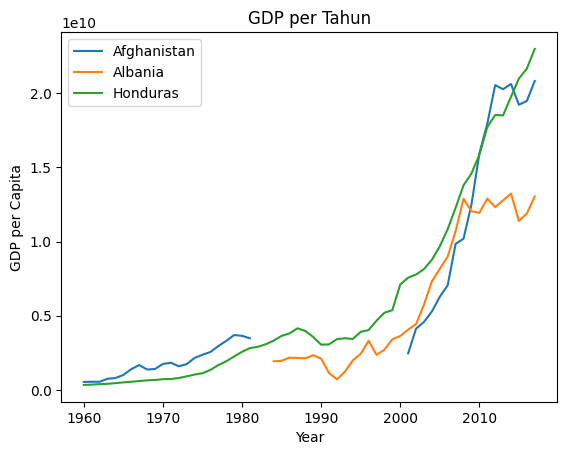

In [945]:
# show data before for Afganistan, Albania, and Honduras
countries = ['Afghanistan', 'Albania', 'Honduras']
data_countries = gdp_data[gdp_data['Country Name'].isin(countries)]

# plot the data
for country in countries:
    country_data = data_countries[data_countries['Country Name'] == country]
    year = country_data.columns[4:].astype(int)
    plt.plot(year, country_data.iloc[:, 4:].values.flatten(), label=country)

plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.title('GDP per Tahun')
plt.legend()
plt.xticks(range(1960, 2011, 10))
plt.show()

In [946]:
# handling missing values with simpleimputer using median strategy
imputer = SimpleImputer(strategy='median')
gdp_data_imputed = pd.DataFrame(imputer.fit_transform(gdp_data.iloc[:, 4:]))

gdp_data_imputed.insert(0, 'Country Name', gdp_data['Country Name'])
gdp_data_imputed.insert(1, 'Country Code', gdp_data['Country Code'])

gdp_data_imputed.columns = ['Country Name', 'Country Code'] + [str(year) for year in range(1960, 2018)]

gdp_data.update(gdp_data_imputed)
gdp_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1.988240e+09,2.074604e+09,2.174966e+09,2.510127e+09,2.766609e+09,2.784309e+09,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,5.038845e+10,5.447389e+10,5.673199e+10,5.317434e+10,5.324089e+10,5.944777e+10
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1.988240e+09,2.074604e+09,2.174966e+09,2.510127e+09,2.766609e+09,2.784309e+09,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1.988240e+09,2.074604e+09,2.174966e+09,2.510127e+09,2.766609e+09,2.784309e+09,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1.988240e+09,2.074604e+09,2.174966e+09,2.510127e+09,2.766609e+09,2.784309e+09,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


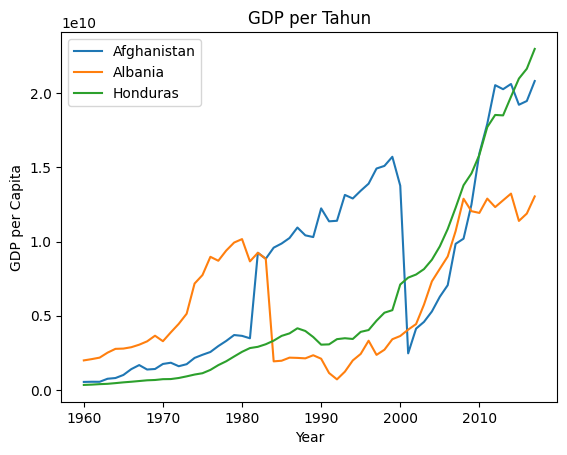

In [947]:
# show updated data for Afganistan, Albania, and Honduras after handling missing values
data_countries = gdp_data[gdp_data['Country Name'].isin(countries)]

for country in countries:
    country_data = data_countries[data_countries['Country Name'] == country]
    year = country_data.columns[4:].astype(int)
    plt.plot(year, country_data.iloc[:, 4:].values.flatten(), label=country)

plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.title('GDP per Tahun')
plt.legend()
plt.xticks(range(1960, 2011, 10))
plt.show()

In [948]:
# melt data
gdp_data = pd.melt(gdp_data, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='GDP')
gdp_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,GDP
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1960,1.988240e+09
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1960,1.988240e+09
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1960,1.988240e+09
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1960,1.988240e+09


In [949]:
# drop columns Indicator Name and Indicator Code
gdp_data = gdp_data.drop(['Indicator Name', 'Indicator Code'], axis=1)
gdp_data.head()

,Country Name,Country Code,Year,GDP
0,Aruba,ABW,1960,1.988240e+09
1,Afghanistan,AFG,1960,5.377778e+08
2,Angola,AGO,1960,1.988240e+09
3,Albania,ALB,1960,1.988240e+09
4,Andorra,AND,1960,1.988240e+09


In [950]:
# duplicate values 
gdp_data.duplicated().sum()

# show the data that has duplicate values
print("Data with duplicate values:")
gdp_data[gdp_data.duplicated()]

Data with duplicate values:


,Country Name,Country Code,Year,GDP


In [951]:
# export the cleaned data utf-16 encoding
gdp_data.to_csv('datasets-cleaned/gdp_data_cleaned.csv', index=False, encoding='utf-8')

### CSV mystery

In [900]:
mystery_data = pd.read_csv("ekstrakdata/mystery.csv")
mystery_data.head()

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [901]:
# check missing values
mystery_data.isnull().sum()

Unnamed: 0        0
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 63, dtype: int64

In [902]:
# drop columns 'Unnamed: 0'
mystery_data = mystery_data.drop('Unnamed: 0', axis=1)
mystery_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [903]:
# handle missing values 
mystery_data = mystery_data.dropna()
mystery_data.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2013              0
2014              0
2015              0
2016              0
2017              0
Length: 62, dtype: int64

In [904]:
mystery_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [905]:
# melt data 
mystery_data = pd.melt(mystery_data, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Mystery')
mystery_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Mystery
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54211.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8996351.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5643182.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1960,1608800.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,1960,13411.0


In [906]:
# drop columns 'Indicator Name' and 'Indicator Code'
mystery_data = mystery_data.drop(['Indicator Name', 'Indicator Code'], axis=1)
mystery_data.head()

,Country Name,Country Code,Year,Mystery
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0


In [907]:
# check duplicate data
mystery_data.duplicated().sum()

# show the data that has duplicate values
print("Data with duplicate values:")
mystery_data[mystery_data.duplicated()]

Data with duplicate values:


,Country Name,Country Code,Year,Mystery


In [908]:
# export the cleaned data utf-16 encoding
mystery_data.to_csv('datasets-cleaned/mystery_cleaned.csv', index=False, encoding='utf-16')

# Transform Lanjutan

#### 1. Kombinasikan data dari rural_population_percent.csv dan electricity_access_percent.csv yang merupakan data populasi pedesaan dan akses listrik dari berbagai negara. dan kemudian gabungkan menggunakan pandas.

In [909]:
rural_cleaned = pd.read_csv("datasets-cleaned/rural_population_percent_cleaned.csv")
electricity_cleaned = pd.read_csv("datasets-cleaned/electricity_access_percent_cleaned.csv")

# merge the data rural_cleaned and electricity_cleaned
rural_electricity = pd.merge(rural_cleaned, electricity_cleaned)

# export the combined data to csv
rural_electricity.to_csv("combined_data.csv", index=False)
rural_electricity

,Country Name,Country Code,Year,Rural Population,Electricity Access
0,Aruba,ABW,1960,49.224,0.0
1,Afghanistan,AFG,1960,91.779,0.0
2,Angola,AGO,1960,89.565,0.0
3,Albania,ALB,1960,69.295,0.0
4,Andorra,AND,1960,41.550,0.0
...,...,...,...,...,...
15307,Kosovo,XKX,2017,0.000,0.0
15308,"Yemen, Rep.",YEM,2017,64.231,0.0
15309,South Africa,ZAF,2017,34.218,0.0
15310,Zambia,ZMB,2017,58.160,0.0


#### 2. Dummy Variables untuk dataset projects_data.csv, population_data.csv, population_data.json, population_data.xml, dan population_data.db. gunakan fungsi get_dummies() untuk membuat dummy variables pada dataset ini. tapi ingat tidak perlu untuk membuat dummy variables pada semua kolom, cukup pada kolom yang memiliki data kategorikal saja.

In [910]:
projects_data_cleaned = pd.read_csv("datasets-cleaned/projects_data_cleaned.csv")
projects_data_cleaned

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,status,...,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url,sector1,sector,mjsector,theme1
0,P162228,Other,World,RE,Investment Project Financing,IN,N,L,Active,Active,...,500000.0,0.0,0.0,0.0,500000.0,http://projects.worldbank.org/P162228?lang=en,NaN,"(Historic)Highways, (Historic)Highways","Agriculture, Fishing and Forestry, Agricultur...",NaN
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,N,L,Active,Active,...,200000000.0,0.0,200000000.0,200000000.0,0.0,http://projects.worldbank.org/P163962?lang=en,NaN,"(Historic)Highways, (Historic)Highways","Agriculture, Fishing and Forestry, Agricultur...",NaN
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,Y,L,Active,Active,...,50000000.0,0.0,58330000.0,58330000.0,0.0,http://projects.worldbank.org/P167672?lang=en,NaN,"(Historic)Highways, (Historic)Highways","Agriculture, Fishing and Forestry, Agricultur...",NaN
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,N,L,Active,Active,...,50000000.0,0.0,20000000.0,20000000.0,0.0,http://projects.worldbank.org/P158768?lang=en,NaN,"(Historic)Highways, (Historic)Highways","Agriculture, Fishing and Forestry, Agricultur...",NaN
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,N,L,Active,Active,...,100000000.0,0.0,100000000.0,100000000.0,0.0,http://projects.worldbank.org/P161364?lang=en,"Social Protection, 63, SA","Social Protection, Social Protection, Other In...","Social Protection, Social Protection, Industry...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,N,L,Closed,Closed,...,13500000.0,13500000.0,0.0,13500000.0,0.0,http://projects.worldbank.org/P006578/power-ir...,"(Historic)Hydro, 100, PH","(Historic)Hydro, (Historic)Hydro","(Historic)Electric Power & Other Energy, (Hist...",NaN
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,PE,Structural Adjustment Loan,AD,N,L,Closed,Closed,...,12000000.0,12000000.0,0.0,12000000.0,0.0,http://projects.worldbank.org/P037451/steel-mi...,"(Historic)Economic management, 100, ME","(Historic)Economic management, (Historic)Econo...","(Historic)Multisector, (Historic)Multisector",NaN
18245,P037362,Europe and Central Asia,Kingdom of Denmark,PE,Structural Adjustment Loan,AD,N,L,Closed,Closed,...,40000000.0,40000000.0,0.0,40000000.0,0.0,http://projects.worldbank.org/P037362/post-war...,"(Historic)Economic management, 100, ME","(Historic)Economic management, (Historic)Econo...","(Historic)Multisector, (Historic)Multisector",NaN
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands,PE,Structural Adjustment Loan,AD,N,L,Closed,Closed,...,195000000.0,195000000.0,0.0,195000000.0,0.0,http://projects.worldbank.org/P037452/post-war...,"(Historic)Economic management, 100, ME","(Historic)Economic management, (Historic)Econo...","(Historic)Multisector, (Historic)Multisector",NaN


In [911]:
# show columns that have unique values 
unique_counts = projects_data_cleaned.nunique()

# Filter columns with less than 5 unique values
threshold = 5 
categorical_columns = unique_counts[unique_counts < threshold].index.tolist()

print("Categorical Coloumns:")
print(categorical_columns)

for column in categorical_columns:
    unique_values = project_data[column].unique()
    print(f"Categories in columns '{column}': {unique_values}")

Categorical Coloumns:
['lendinginstrtype', 'supplementprojectflg', 'productlinetype', 'projectstatusdisplay', 'status']
Categories in columns 'lendinginstrtype': ['IN' 'AD' 'PR' 'XX']
Categories in columns 'supplementprojectflg': ['N' 'Y']
Categories in columns 'productlinetype': ['L']
Categories in columns 'projectstatusdisplay': ['Active' 'Closed' 'Dropped' 'Pipeline']
Categories in columns 'status': ['Active' 'Closed' 'Dropped' 'Pipeline']


In [912]:
# show data columns 'status'
projects_data_cleaned['status']

0        Active
1        Active
2        Active
3        Active
4        Active
          ...  
18243    Closed
18244    Closed
18245    Closed
18246    Closed
18247    Closed
Name: status, Length: 18248, dtype: object

In [913]:
# dummies columns data 'status' 
dummy_variables = pd.get_dummies(projects_data_cleaned['status'])
project_data_with_dummies = pd.concat([projects_data_cleaned, dummy_variables], axis=1)

project_data_with_dummies.drop(columns='status', inplace=True)
project_data_with_dummies.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,project_name,...,grantamt,url,sector1,sector,mjsector,theme1,Active,Closed,Dropped,Pipeline
0,P162228,Other,World,RE,Investment Project Financing,IN,N,L,Active,Creating a Trade in Value-Added Database for ...,...,500000.0,http://projects.worldbank.org/P162228?lang=en,NaN,"(Historic)Highways, (Historic)Highways","Agriculture, Fishing and Forestry, Agricultur...",NaN,True,False,False,False
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,N,L,Active,Productive Inclusion Project,...,0.0,http://projects.worldbank.org/P163962?lang=en,NaN,"(Historic)Highways, (Historic)Highways","Agriculture, Fishing and Forestry, Agricultur...",NaN,True,False,False,False
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,Y,L,Active,Additional Financing for Health Sector Support...,...,0.0,http://projects.worldbank.org/P167672?lang=en,NaN,"(Historic)Highways, (Historic)Highways","Agriculture, Fishing and Forestry, Agricultur...",NaN,True,False,False,False
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,N,L,Active,Public-Private Partnerships and Public Investm...,...,0.0,http://projects.worldbank.org/P158768?lang=en,NaN,"(Historic)Highways, (Historic)Highways","Agriculture, Fishing and Forestry, Agricultur...",NaN,True,False,False,False
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,N,L,Active,Nigeria For Women Project,...,0.0,http://projects.worldbank.org/P161364?lang=en,"Social Protection, 63, SA","Social Protection, Social Protection, Other In...","Social Protection, Social Protection, Industry...",NaN,True,False,False,False


In [914]:
# export data to csv file
project_data_with_dummies.to_csv("projects_data_dummies.csv", index=False)

### 3. Merge Data in Population CSV, XML, JSON, DB, AND API

In [920]:
population_data_cleaned = pd.read_csv("datasets-cleaned/population_data_cleaned.csv")
population_json_cleaned = pd.read_csv("datasets-cleaned/population_data_json_cleaned.csv")
population_xml_cleaned = pd.read_csv("datasets-cleaned/population_data_xml_cleaned.csv")
population_db_cleaned = pd.read_csv("datasets-cleaned/population_data_db_cleaned.csv")
population_api_cleaned = pd.read_csv("datasets-cleaned/population_data_api_cleaned.csv")

# Gabungkan semua data menjadi satu
merged_population_data = pd.concat([population_data_cleaned, population_json_cleaned, population_xml_cleaned, population_db_cleaned, population_api_cleaned])

# Show combined results
merged_population_data

,Country Name,Country Code,Year,Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0
...,...,...,...,...
995,Heavily indebted poor countries (HIPC),HPC,1988,339527267.0
996,Heavily indebted poor countries (HIPC),HPC,1987,330566338.0
997,Heavily indebted poor countries (HIPC),HPC,1986,321846502.0
998,Heavily indebted poor countries (HIPC),HPC,1985,313452117.0


In [921]:
# check duplicate columns
merged_population_data.duplicated().sum()

# show the data that has duplicate values
print("Data with duplicate values:")
merged_population_data[merged_population_data.duplicated()]

Data with duplicate values:


,Country Name,Country Code,Year,Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0
...,...,...,...,...
14963,Zimbabwe,ZWE,2017,16529904.0
265,Central Europe and the Baltics,CEB,2014,103496179.0
266,Central Europe and the Baltics,CEB,2013,103713726.0
267,Central Europe and the Baltics,CEB,2012,103935318.0


In [922]:
# drop columns duplicate
merged_population_data = merged_population_data.drop_duplicates()

In [924]:
# show the data 
merged_population_data

,Country Name,Country Code,Year,Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0
...,...,...,...,...
995,Heavily indebted poor countries (HIPC),HPC,1988,339527267.0
996,Heavily indebted poor countries (HIPC),HPC,1987,330566338.0
997,Heavily indebted poor countries (HIPC),HPC,1986,321846502.0
998,Heavily indebted poor countries (HIPC),HPC,1985,313452117.0


In [925]:
# export the combined data to csv file 
merged_population_data.to_csv("population_data_merge.csv", index=False)

### 4. Menghapus Outliers pada dataset projects_data.csv, population_data.csv, population_data.json, population_data.xml, dan population_data.db. gunakan teknik IQR, Z-Score, atau teknik lain untuk menghapus outliers pada dataset ini. kemudian buatkan presentasi visualisasi data sebelum dan sesudah menghapus outliers. (boxplot, histogram, atau teknik lain).

In [927]:
def remove_outlierdata(df, columns):
    for i, column in enumerate(columns):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        print(f"Column ke {i+1}")
        print(f"Q1: {Q1}")
        print(f"Q3: {Q3}")
        print(f"IQR: {IQR}")
        print(f"lower_bound: {lower_bound}")
        print(f"upper_bound: {upper_bound}\n")
        
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
    return df

In [928]:
projects_data_cleaned

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,status,...,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url,sector1,sector,mjsector,theme1
0,P162228,Other,World,RE,Investment Project Financing,IN,N,L,Active,Active,...,500000.0,0.0,0.0,0.0,500000.0,http://projects.worldbank.org/P162228?lang=en,NaN,"(Historic)Highways, (Historic)Highways","Agriculture, Fishing and Forestry, Agricultur...",NaN
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,N,L,Active,Active,...,200000000.0,0.0,200000000.0,200000000.0,0.0,http://projects.worldbank.org/P163962?lang=en,NaN,"(Historic)Highways, (Historic)Highways","Agriculture, Fishing and Forestry, Agricultur...",NaN
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,Y,L,Active,Active,...,50000000.0,0.0,58330000.0,58330000.0,0.0,http://projects.worldbank.org/P167672?lang=en,NaN,"(Historic)Highways, (Historic)Highways","Agriculture, Fishing and Forestry, Agricultur...",NaN
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,N,L,Active,Active,...,50000000.0,0.0,20000000.0,20000000.0,0.0,http://projects.worldbank.org/P158768?lang=en,NaN,"(Historic)Highways, (Historic)Highways","Agriculture, Fishing and Forestry, Agricultur...",NaN
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,N,L,Active,Active,...,100000000.0,0.0,100000000.0,100000000.0,0.0,http://projects.worldbank.org/P161364?lang=en,"Social Protection, 63, SA","Social Protection, Social Protection, Other In...","Social Protection, Social Protection, Industry...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,N,L,Closed,Closed,...,13500000.0,13500000.0,0.0,13500000.0,0.0,http://projects.worldbank.org/P006578/power-ir...,"(Historic)Hydro, 100, PH","(Historic)Hydro, (Historic)Hydro","(Historic)Electric Power & Other Energy, (Hist...",NaN
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,PE,Structural Adjustment Loan,AD,N,L,Closed,Closed,...,12000000.0,12000000.0,0.0,12000000.0,0.0,http://projects.worldbank.org/P037451/steel-mi...,"(Historic)Economic management, 100, ME","(Historic)Economic management, (Historic)Econo...","(Historic)Multisector, (Historic)Multisector",NaN
18245,P037362,Europe and Central Asia,Kingdom of Denmark,PE,Structural Adjustment Loan,AD,N,L,Closed,Closed,...,40000000.0,40000000.0,0.0,40000000.0,0.0,http://projects.worldbank.org/P037362/post-war...,"(Historic)Economic management, 100, ME","(Historic)Economic management, (Historic)Econo...","(Historic)Multisector, (Historic)Multisector",NaN
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands,PE,Structural Adjustment Loan,AD,N,L,Closed,Closed,...,195000000.0,195000000.0,0.0,195000000.0,0.0,http://projects.worldbank.org/P037452/post-war...,"(Historic)Economic management, 100, ME","(Historic)Economic management, (Historic)Econo...","(Historic)Multisector, (Historic)Multisector",NaN


In [929]:
# Menampilkan statistik deskriptif untuk kolom numerik
projects_data_cleaned.describe()

,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt
count,1.824800e+04,1.824800e+04,1.824800e+04,1.824800e+04,1.824800e+04
mean,1.348273e+08,4.240088e+07,2.254831e+07,6.494919e+07,1.888913e+06
std,1.130270e+09,1.198625e+08,5.821865e+07,1.274036e+08,4.225696e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.200000e+06,0.000000e+00,0.000000e+00,5.000000e+06,0.000000e+00
50%,3.000000e+07,0.000000e+00,0.000000e+00,2.330000e+07,0.000000e+00
75%,1.000000e+08,3.000000e+07,2.000000e+07,7.100000e+07,0.000000e+00
max,9.300700e+10,3.750000e+09,1.200000e+09,3.750000e+09,5.330000e+09


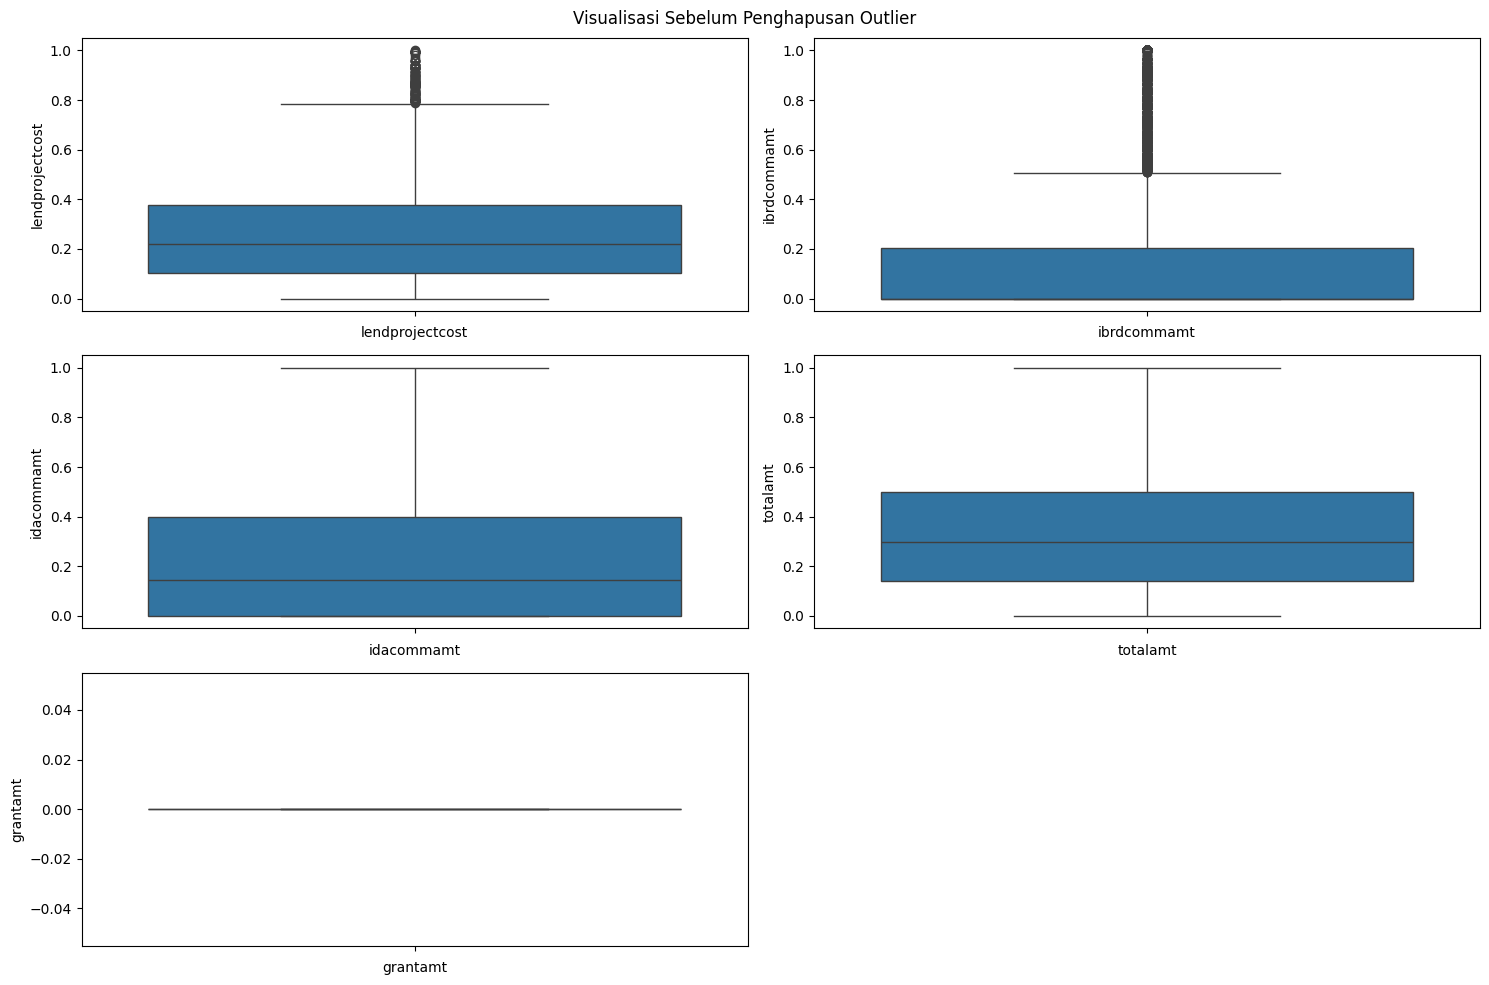

In [970]:
# Visualisasi data sebelum penghapusan outliers columns "lendprojectcost", "ibrdcommamt", "idacommamt", "totalamt", "grantamt"
columns_visualize = ["lendprojectcost", "ibrdcommamt", "idacommamt", "totalamt", "grantamt"]

fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle("Visualisasi Sebelum Penghapusan Outlier")

sns.boxplot(ax=axes[0, 0], data=projects_data_cleaned, y=columns_visualize[0])
axes[0, 0].set_xlabel(columns_visualize[0])
sns.boxplot(ax=axes[0, 1], data=projects_data_cleaned, y=columns_visualize[1])
axes[0, 1].set_xlabel(columns_visualize[1])
sns.boxplot(ax=axes[1, 0], data=projects_data_cleaned, y=columns_visualize[2])
axes[1, 0].set_xlabel(columns_visualize[2])
sns.boxplot(ax=axes[1, 1], data=projects_data_cleaned, y=columns_visualize[3])
axes[1, 1].set_xlabel(columns_visualize[3])
sns.boxplot(ax=axes[2, 0], data=projects_data_cleaned, y=columns_visualize[4])
axes[2, 0].set_xlabel(columns_visualize[4])

# Mengatur subplot terakhir yang kosong agar tidak ditampilkan
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

In [932]:
# delete outlier 
columns_check = ["lendprojectcost", "ibrdcommamt", "idacommamt", "totalamt", "grantamt"]
projects_data_cleaned = remove_outlierdata(projects_data_cleaned, columns_check)
projects_data_cleaned = projects_data_cleaned.reset_index(drop=True)

outlier_columns = projects_data_cleaned[columns_check]
print(outlier_columns)

Column ke 1
Q1: 7800000.0
Q3: 35000000.0
IQR: 27200000.0
lower_bound: -33000000.0
upper_bound: 75800000.0

Column ke 2
Q1: 0.0
Q3: 12000000.0
IQR: 12000000.0
lower_bound: -18000000.0
upper_bound: 30000000.0

Column ke 3
Q1: 0.0
Q3: 20000000.0
IQR: 20000000.0
lower_bound: -30000000.0
upper_bound: 50000000.0

Column ke 4
Q1: 5500000.0
Q3: 25000000.0
IQR: 19500000.0
lower_bound: -23750000.0
upper_bound: 54250000.0

Column ke 5
Q1: 0.0
Q3: 0.0
IQR: 0.0
lower_bound: 0.0
upper_bound: 0.0

      lendprojectcost  ibrdcommamt  idacommamt    totalamt  grantamt
0          50000000.0          0.0  20000000.0  20000000.0       0.0
1          35000000.0          0.0  30000000.0  30000000.0       0.0
2          25000000.0          0.0  35000000.0  35000000.0       0.0
3          50000000.0          0.0  50000000.0  50000000.0       0.0
4          10000000.0          0.0  10000000.0  10000000.0       0.0
...               ...          ...         ...         ...       ...
8033        2000000.0    2000

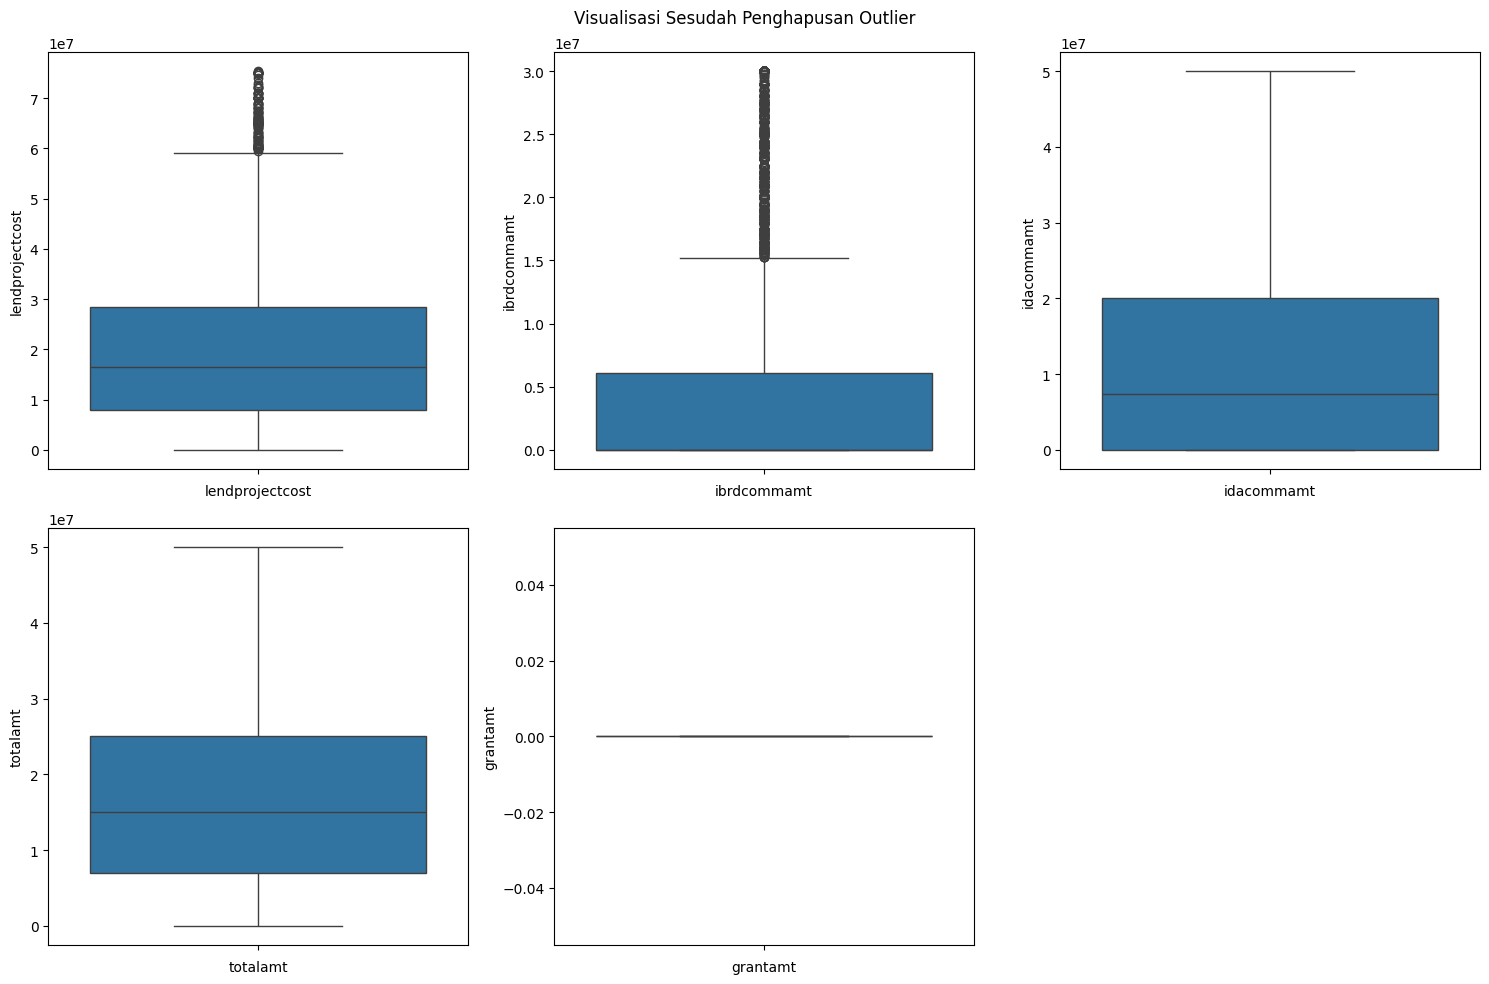

In [933]:
# Visualisasi data sesudah penghapusan outliers
columns_visualize = ["lendprojectcost", "ibrdcommamt", "idacommamt", "totalamt", "grantamt"]

fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle("Visualisasi Sesudah Penghapusan Outlier")

sns.boxplot(ax=axes[0, 0], data=projects_data_cleaned, y=columns_visualize[0])
axes[0, 0].set_xlabel(columns_visualize[0])
sns.boxplot(ax=axes[0, 1], data=projects_data_cleaned, y=columns_visualize[1])
axes[0, 1].set_xlabel(columns_visualize[1])
sns.boxplot(ax=axes[1, 0], data=projects_data_cleaned, y=columns_visualize[2])
axes[1, 0].set_xlabel(columns_visualize[2])
sns.boxplot(ax=axes[1, 1], data=projects_data_cleaned, y=columns_visualize[3])
axes[1, 1].set_xlabel(columns_visualize[3])
sns.boxplot(ax=axes[2, 0], data=projects_data_cleaned, y=columns_visualize[4])
axes[2, 0].set_xlabel(columns_visualize[4])

# Mengatur subplot terakhir yang kosong agar tidak ditampilkan
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

In [934]:
projects_data_cleaned.to_csv("datasets-cleaned/projects_data_cleaned.csv", index=False)
projects_data_cleaned

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,status,...,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url,sector1,sector,mjsector,theme1
0,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,N,L,Active,Active,...,50000000.0,0.0,20000000.0,20000000.0,0.0,http://projects.worldbank.org/P158768?lang=en,NaN,"(Historic)Highways, (Historic)Highways","Agriculture, Fishing and Forestry, Agricultur...",NaN
1,P164289,Latin America and Caribbean,Grenada,PE,Development Policy Lending,AD,N,L,Active,Active,...,35000000.0,0.0,30000000.0,30000000.0,0.0,http://projects.worldbank.org/P164289?lang=en,"Other Public Administration, 56, BZ","Other Public Administration, Other Public Admi...","Public Administration, Public Administration, ...",NaN
2,P165425,Latin America and Caribbean,Co-operative Republic of Guyana,PE,Development Policy Lending,AD,N,L,Active,Active,...,25000000.0,0.0,35000000.0,35000000.0,0.0,http://projects.worldbank.org/P165425?lang=en,NaN,"(Historic)Highways, (Historic)Highways","Agriculture, Fishing and Forestry, Agricultur...",NaN
3,P161317,Africa,Republic of Kenya,PE,Investment Project Financing,IN,N,L,Active,Active,...,50000000.0,0.0,50000000.0,50000000.0,0.0,http://projects.worldbank.org/P161317?lang=en,NaN,"(Historic)Highways, (Historic)Highways","Agriculture, Fishing and Forestry, Agricultur...",NaN
4,P167330,East Asia and Pacific,Kingdom of Tonga,PE,Development Policy Lending,AD,N,L,Active,Active,...,10000000.0,0.0,10000000.0,10000000.0,0.0,http://projects.worldbank.org/P167330?lang=en,"Energy Transmission and Distribution, 7, LT","Energy Transmission and Distribution, Energy T...","Energy and Extractives, Energy and Extractives...","Regulation and competition policy, 25, 40"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8033,P037454,Europe and Central Asia,Kingdom of the Netherlands,PE,Sector Investment and Maintenance Loan,IN,N,L,Closed,Closed,...,2000000.0,2000000.0,0.0,2000000.0,0.0,http://projects.worldbank.org/P037454/united-n...,"(Historic)Transportation adjustment, 100, TT","(Historic)Transportation adjustment, (Historic...","Transportation, Transportation",NaN
8034,P037455,Europe and Central Asia,Kingdom of the Netherlands,PE,Sector Investment and Maintenance Loan,IN,N,L,Closed,Closed,...,2000000.0,2000000.0,0.0,2000000.0,0.0,http://projects.worldbank.org/P037455/holland-...,"(Historic)Transportation adjustment, 100, TT","(Historic)Transportation adjustment, (Historic...","Transportation, Transportation",NaN
8035,P006577,Latin America and Caribbean,Republic of Chile,PE,Financial Intermediary Loan,IN,N,L,Closed,Closed,...,2500000.0,2500000.0,0.0,2500000.0,0.0,http://projects.worldbank.org/P006577/agricult...,"(Historic)Agriculture adjustment, 100, AA","(Historic)Agriculture adjustment, (Historic)Ag...","Agriculture, Fishing and Forestry, Agricultur...",NaN
8036,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,N,L,Closed,Closed,...,13500000.0,13500000.0,0.0,13500000.0,0.0,http://projects.worldbank.org/P006578/power-ir...,"(Historic)Hydro, 100, PH","(Historic)Hydro, (Historic)Hydro","(Historic)Electric Power & Other Energy, (Hist...",NaN


### 5. Scaling Features pada dataset projects_data.csv, population_data.csv, population_data.json, population_data.xml, dan population_data.db. gunakan StandardScaler, MinMaxScaler, atau teknik lain untuk melakukan scaling pada dataset ini. contohnya pada fitur GDP atau population.

In [935]:
from sklearn.preprocessing import MinMaxScaler

def scale_features(data, columns):
    scaler = MinMaxScaler()
    scaled_data = data.copy()
    scaled_data[columns] = scaler.fit_transform(data[columns])
    return scaled_data

#### - Project Data

In [936]:
# scaling features in projects_data
columns_check = ["lendprojectcost", "ibrdcommamt", "idacommamt", "totalamt", "grantamt"]
projects_data_cleaned = scale_features(projects_data_cleaned, columns_check)
projects_data_cleaned

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,status,...,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url,sector1,sector,mjsector,theme1
0,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,N,L,Active,Active,...,0.663482,0.000000,0.4,0.40,0.0,http://projects.worldbank.org/P158768?lang=en,NaN,"(Historic)Highways, (Historic)Highways","Agriculture, Fishing and Forestry, Agricultur...",NaN
1,P164289,Latin America and Caribbean,Grenada,PE,Development Policy Lending,AD,N,L,Active,Active,...,0.464437,0.000000,0.6,0.60,0.0,http://projects.worldbank.org/P164289?lang=en,"Other Public Administration, 56, BZ","Other Public Administration, Other Public Admi...","Public Administration, Public Administration, ...",NaN
2,P165425,Latin America and Caribbean,Co-operative Republic of Guyana,PE,Development Policy Lending,AD,N,L,Active,Active,...,0.331741,0.000000,0.7,0.70,0.0,http://projects.worldbank.org/P165425?lang=en,NaN,"(Historic)Highways, (Historic)Highways","Agriculture, Fishing and Forestry, Agricultur...",NaN
3,P161317,Africa,Republic of Kenya,PE,Investment Project Financing,IN,N,L,Active,Active,...,0.663482,0.000000,1.0,1.00,0.0,http://projects.worldbank.org/P161317?lang=en,NaN,"(Historic)Highways, (Historic)Highways","Agriculture, Fishing and Forestry, Agricultur...",NaN
4,P167330,East Asia and Pacific,Kingdom of Tonga,PE,Development Policy Lending,AD,N,L,Active,Active,...,0.132696,0.000000,0.2,0.20,0.0,http://projects.worldbank.org/P167330?lang=en,"Energy Transmission and Distribution, 7, LT","Energy Transmission and Distribution, Energy T...","Energy and Extractives, Energy and Extractives...","Regulation and competition policy, 25, 40"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8033,P037454,Europe and Central Asia,Kingdom of the Netherlands,PE,Sector Investment and Maintenance Loan,IN,N,L,Closed,Closed,...,0.026539,0.066667,0.0,0.04,0.0,http://projects.worldbank.org/P037454/united-n...,"(Historic)Transportation adjustment, 100, TT","(Historic)Transportation adjustment, (Historic...","Transportation, Transportation",NaN
8034,P037455,Europe and Central Asia,Kingdom of the Netherlands,PE,Sector Investment and Maintenance Loan,IN,N,L,Closed,Closed,...,0.026539,0.066667,0.0,0.04,0.0,http://projects.worldbank.org/P037455/holland-...,"(Historic)Transportation adjustment, 100, TT","(Historic)Transportation adjustment, (Historic...","Transportation, Transportation",NaN
8035,P006577,Latin America and Caribbean,Republic of Chile,PE,Financial Intermediary Loan,IN,N,L,Closed,Closed,...,0.033174,0.083333,0.0,0.05,0.0,http://projects.worldbank.org/P006577/agricult...,"(Historic)Agriculture adjustment, 100, AA","(Historic)Agriculture adjustment, (Historic)Ag...","Agriculture, Fishing and Forestry, Agricultur...",NaN
8036,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,N,L,Closed,Closed,...,0.179140,0.450000,0.0,0.27,0.0,http://projects.worldbank.org/P006578/power-ir...,"(Historic)Hydro, 100, PH","(Historic)Hydro, (Historic)Hydro","(Historic)Electric Power & Other Energy, (Hist...",NaN


In [940]:
# Export data to csv file dan encoding utf-8
projects_data_cleaned.to_csv('datasets-cleaned/projects_data_cleaned.csv', index=False, encoding='utf-8')

#### - Population Data

In [952]:
# scaling features in population_data
merged_population_data = scale_features(merged_population_data, ['Population'])
merged_population_data

,Country Name,Country Code,Year,Population
0,Aruba,ABW,1960,0.000007
1,Afghanistan,AFG,1960,0.001194
2,Angola,AGO,1960,0.000749
3,Albania,ALB,1960,0.000213
4,Andorra,AND,1960,0.000001
...,...,...,...,...
995,Heavily indebted poor countries (HIPC),HPC,1988,0.045087
996,Heavily indebted poor countries (HIPC),HPC,1987,0.043897
997,Heavily indebted poor countries (HIPC),HPC,1986,0.042739
998,Heavily indebted poor countries (HIPC),HPC,1985,0.041625


In [953]:
# Export data to csv file dan encoding utf-8
merged_population_data.to_csv('population_data_merge.csv', index=False, encoding='utf-8')

#### - GDP Data

In [954]:
# scaling feature in GDP_Data
gdp_cleaned = pd.read_csv("datasets-cleaned/gdp_data_cleaned.csv")
gdp_cleaned = scale_features(gdp_data, ['GDP'])
gdp_cleaned

,Country Name,Country Code,Year,GDP
0,Aruba,ABW,1960,0.000025
1,Afghanistan,AFG,1960,0.000007
2,Angola,AGO,1960,0.000025
3,Albania,ALB,1960,0.000025
4,Andorra,AND,1960,0.000025
...,...,...,...,...
15307,Kosovo,XKX,2017,0.000088
15308,"Yemen, Rep.",YEM,2017,0.000737
15309,South Africa,ZAF,2017,0.004331
15310,Zambia,ZMB,2017,0.000320


In [956]:
# Export data to csv file dan encoding utf-8
gdp_cleaned.to_csv('datasets-cleaned/gdp_data_cleaned.csv', index=False, encoding='utf-8')

### 6. Feature Engineering pada dataset projects_data.csv, population_data.csv, population_data.json, population_data.xml, dan population_data.db. lakukan feature engineering pada dataset ini, misalnya menambahkan kolom baru, menggabungkan kolom, atau teknik lain untuk meningkatkan kualiats data. misalnya gdppercapita = gdp/population.

#### GDP dan Population (GDP per Capita)

In [957]:
gdp_cleaned = pd.read_csv("datasets-cleaned/gdp_data_cleaned.csv")
merged_population_data = pd.read_csv("population_data_merge.csv")

gdp_population = pd.merge(gdp_cleaned, merged_population_data)
gdp_population

,Country Name,Country Code,Year,GDP,Population
0,Aruba,ABW,1960,0.000025,0.000007
1,Afghanistan,AFG,1960,0.000007,0.001194
2,Angola,AGO,1960,0.000025,0.000749
3,Albania,ALB,1960,0.000025,0.000213
4,Andorra,AND,1960,0.000025,0.000001
...,...,...,...,...,...
15743,Kosovo,XKX,2017,0.000088,0.000243
15744,"Yemen, Rep.",YEM,2017,0.000737,0.003751
15745,South Africa,ZAF,2017,0.004331,0.007531
15746,Zambia,ZMB,2017,0.000320,0.002269


In [958]:
gdp_per_capita = gdp_population[["Country Name", "Country Code", "Year", "GDP", "Population"]]
gdp_per_capita["GDP per Capita"] = gdp_per_capita["GDP"] / gdp_per_capita["Population"]
gdp_per_capita

,Country Name,Country Code,Year,GDP,Population,GDP per Capita
0,Aruba,ABW,1960,0.000025,0.000007,3.699877
1,Afghanistan,AFG,1960,0.000007,0.001194,0.005490
2,Angola,AGO,1960,0.000025,0.000749,0.032762
3,Albania,ALB,1960,0.000025,0.000213,0.115139
4,Andorra,AND,1960,0.000025,0.000001,20.230210
...,...,...,...,...,...,...
15743,Kosovo,XKX,2017,0.000088,0.000243,0.363831
15744,"Yemen, Rep.",YEM,2017,0.000737,0.003751,0.196400
15745,South Africa,ZAF,2017,0.004331,0.007531,0.575021
15746,Zambia,ZMB,2017,0.000320,0.002269,0.140899


#### GDP dan Rural Electrical

In [959]:
gdp_rural_electricity = pd.merge(gdp_per_capita, rural_electricity)
gdp_rural_electricity.head()

,Country Name,Country Code,Year,GDP,Population,GDP per Capita,Rural Population,Electricity Access
0,Aruba,ABW,1960,0.000025,0.000007,3.699877,49.224,0.0
1,Afghanistan,AFG,1960,0.000007,0.001194,0.005490,91.779,0.0
2,Angola,AGO,1960,0.000025,0.000749,0.032762,89.565,0.0
3,Albania,ALB,1960,0.000025,0.000213,0.115139,69.295,0.0
4,Andorra,AND,1960,0.000025,0.000001,20.230210,41.550,0.0


#### GDP dan Project Data

In [960]:
projects_data_cleaned

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,status,...,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url,sector1,sector,mjsector,theme1
0,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,N,L,Active,Active,...,0.663482,0.000000,0.4,0.40,0.0,http://projects.worldbank.org/P158768?lang=en,NaN,"(Historic)Highways, (Historic)Highways","Agriculture, Fishing and Forestry, Agricultur...",NaN
1,P164289,Latin America and Caribbean,Grenada,PE,Development Policy Lending,AD,N,L,Active,Active,...,0.464437,0.000000,0.6,0.60,0.0,http://projects.worldbank.org/P164289?lang=en,"Other Public Administration, 56, BZ","Other Public Administration, Other Public Admi...","Public Administration, Public Administration, ...",NaN
2,P165425,Latin America and Caribbean,Co-operative Republic of Guyana,PE,Development Policy Lending,AD,N,L,Active,Active,...,0.331741,0.000000,0.7,0.70,0.0,http://projects.worldbank.org/P165425?lang=en,NaN,"(Historic)Highways, (Historic)Highways","Agriculture, Fishing and Forestry, Agricultur...",NaN
3,P161317,Africa,Republic of Kenya,PE,Investment Project Financing,IN,N,L,Active,Active,...,0.663482,0.000000,1.0,1.00,0.0,http://projects.worldbank.org/P161317?lang=en,NaN,"(Historic)Highways, (Historic)Highways","Agriculture, Fishing and Forestry, Agricultur...",NaN
4,P167330,East Asia and Pacific,Kingdom of Tonga,PE,Development Policy Lending,AD,N,L,Active,Active,...,0.132696,0.000000,0.2,0.20,0.0,http://projects.worldbank.org/P167330?lang=en,"Energy Transmission and Distribution, 7, LT","Energy Transmission and Distribution, Energy T...","Energy and Extractives, Energy and Extractives...","Regulation and competition policy, 25, 40"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8033,P037454,Europe and Central Asia,Kingdom of the Netherlands,PE,Sector Investment and Maintenance Loan,IN,N,L,Closed,Closed,...,0.026539,0.066667,0.0,0.04,0.0,http://projects.worldbank.org/P037454/united-n...,"(Historic)Transportation adjustment, 100, TT","(Historic)Transportation adjustment, (Historic...","Transportation, Transportation",NaN
8034,P037455,Europe and Central Asia,Kingdom of the Netherlands,PE,Sector Investment and Maintenance Loan,IN,N,L,Closed,Closed,...,0.026539,0.066667,0.0,0.04,0.0,http://projects.worldbank.org/P037455/holland-...,"(Historic)Transportation adjustment, 100, TT","(Historic)Transportation adjustment, (Historic...","Transportation, Transportation",NaN
8035,P006577,Latin America and Caribbean,Republic of Chile,PE,Financial Intermediary Loan,IN,N,L,Closed,Closed,...,0.033174,0.083333,0.0,0.05,0.0,http://projects.worldbank.org/P006577/agricult...,"(Historic)Agriculture adjustment, 100, AA","(Historic)Agriculture adjustment, (Historic)Ag...","Agriculture, Fishing and Forestry, Agricultur...",NaN
8036,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,N,L,Closed,Closed,...,0.179140,0.450000,0.0,0.27,0.0,http://projects.worldbank.org/P006578/power-ir...,"(Historic)Hydro, 100, PH","(Historic)Hydro, (Historic)Hydro","(Historic)Electric Power & Other Energy, (Hist...",NaN


In [962]:
# Unique country names from GDP dataset
unique_countrynames_gdp = gdp_rural_electricity['Country Name'].unique()

# regex pattern from country names in GDP dataset
regex_pattern = '|'.join(map(re.escape, unique_countrynames_gdp))

# Dictionary to map project data country names to GDP dataset country names
nama_negara = {}
for country_name_project_data in projects_data_cleaned['countryname'].unique():
    match = re.search(regex_pattern, country_name_project_data)
    if match:
        nama_negara[country_name_project_data] = match.group()

# Replace country names in project data
projects_data_cleaned['countryname'] = projects_data_cleaned['countryname'].replace(nama_negara)

# Sort and reset index of project data
projects_data_cleaned = projects_data_cleaned.sort_values(by='countryname', ascending=True)
projects_data_cleaned = projects_data_cleaned.reset_index(drop=True)

# Add a "Year" column based on "boardapprovaldate"
projects_data_cleaned['boardapprovaldate'] = pd.to_datetime(projects_data_cleaned['boardapprovaldate'])
projects_data_cleaned['Year'] = projects_data_cleaned['boardapprovaldate'].dt.year

# Select specific columns for further analysis
projects_data_new = projects_data_cleaned[["countryname", "status", "project_name", "Year", "lendprojectcost"]]

# Rename columns
projects_data_new = projects_data_new.rename(columns={
    "countryname": "Country Name",
    "status": "Status",
    "project_name": "Project Name",
    "lendprojectcost": "Project Cost"
})

projects_data_new

,Country Name,Status,Project Name,Year,Project Cost
0,Afghanistan,Active,Public-Private Partnerships and Public Investm...,2018,0.663482
1,Afghanistan,Closed,Education Project,1964,0.046444
2,Afghanistan,Closed,Emergency Irrigation Rehabilitation (Additiona...,2008,0.371550
3,Afghanistan,Closed,Afghanistan Health (supplement II),2008,0.265393
4,Afghanistan,Active,Additional Financing to Financial Sector Rapid...,2013,0.088907
...,...,...,...,...,...
8033,Zimbabwe,Closed,Kariba Electric Power Development Project (02),1964,0.051752
8034,Zimbabwe,Closed,Agricultural Development Project,1960,0.074310
8035,Zimbabwe,Closed,Small Farm Credit Project,1982,0.403397
8036,Zimbabwe,Closed,Highway Project (01),1983,0.350318


In [963]:
# Group by "Country Name" and the "Project Cost"
projects_data_grouped = projects_data_new.groupby("Country Name")["Project Cost"].sum().reset_index()
projects_data_grouped

,Country Name,Project Cost
0,Afghanistan,26.426619
1,Africa,18.764597
2,Albania,22.556263
3,Algeria,5.546046
4,Angola,7.881768
...,...,...
180,Western Africa,5.247744
181,Western Balkans,0.165870
182,World,0.016454
183,Zambia,29.564358


In [964]:
# merge data projects_data_grouped and gdp_rural_electricity
data_social = pd.merge(gdp_rural_electricity, projects_data_grouped)
data_social

,Country Name,Country Code,Year,GDP,Population,GDP per Capita,Rural Population,Electricity Access,Project Cost
0,Afghanistan,AFG,1960,0.000007,0.001194,0.005490,91.779,0.0,26.426619
1,Angola,AGO,1960,0.000025,0.000749,0.032762,89.565,0.0,7.881768
2,Albania,ALB,1960,0.000025,0.000213,0.115139,69.295,0.0,22.556263
3,Armenia,ARM,1960,0.000025,0.000248,0.098801,48.725,0.0,23.446391
4,Antigua and Barbuda,ATG,1960,0.000025,0.000007,3.618141,60.344,0.0,0.132696
...,...,...,...,...,...,...,...,...,...
8463,Samoa,WSM,2017,0.000011,0.000026,0.411774,81.170,0.0,5.617569
8464,Kosovo,XKX,2017,0.000088,0.000243,0.363831,0.000,0.0,4.997479
8465,South Africa,ZAF,2017,0.004331,0.007531,0.575021,34.218,0.0,3.673036
8466,Zambia,ZMB,2017,0.000320,0.002269,0.140899,58.160,0.0,29.564358


In [965]:
# check duplicate
data_social.duplicated().sum()

# show the data that has duplicate values
print("Data with duplicate values:")
data_social[data_social.duplicated()]

Data with duplicate values:


,Country Name,Country Code,Year,GDP,Population,GDP per Capita,Rural Population,Electricity Access,Project Cost


In [966]:
# export data to csv file
data_social.to_csv("data-fix/data_social.csv", index=False)

# Load Data

In [ ]:
from dotenv import load_dotenv
from google.cloud import storage
import os

In [ ]:
# load data using google cloud storage
load_dotenv()

storage_bucket = os.getenv("GOOGLE_STORAGE_BUCKET")
storage_client = storage.Client(credentials=credentials_path)




In [400]:
# CONTOH LOAD1

load_dotenv()

storage_bucket = os.getenv("GOOGLE_STORAGE_BUCKET")
credentials_path = os.getenv("GOOGLE_APPLICATION_CREDENTIALS")

with open(credentials_path) as f:
    service_account_info = json.load(f)

credentials_info = google.oauth2.service_account.Credentials.from_service_account_info(
    service_account_info
)

storage_client = google.cloud.storage.Client(credentials=credentials_info)

bucket = storage_client.get_bucket(storage_bucket)

datetime_now = datetime.now().strftime("%d%m%Y-%H-%M-%S")

blob = bucket.blob(f"data-{datetime_now}/country_sosio_economic.csv")
blob.upload_from_filename("D:\Alterra Academy\mini-project\mini-project_ika-purwanti\data_fix\country_sosio_economic.csv")

print("File Uploaded to Bucket")

In [ ]:
# CONTOH LOAD2

from dotenv import load_dotenv
import os
import firebase_admin
from firebase_admin import credentials
from firebase_admin import storage

def load_data(df):

    load_dotenv()
    CERTIFICATE_PATH = os.getenv('CERTIFICATE_PATH')
    GOOGLE_STORAGE_BUCKET = os.getenv('GOOGLE_STORAGE_BUCKET')

    try:
        cred = credentials.Certificate(CERTIFICATE_PATH)

        storage_bucket = GOOGLE_STORAGE_BUCKET

        firebase_admin.initialize_app(cred, {"storageBucket": storage_bucket})

        bucket = storage.bucket()

        filename = "miniproject.csv"

        df.to_csv(filename, index=False)

        blob = bucket.blob(blob_name=filename)

        blob.upload_from_filename(filename)

        print("Data loaded successfully")
            
    except Exception as e:
        print(f"An error occurred when loading data to the storage: {e}")

load_data(df_load)

# Data Visualization

### Buatlah analisis data yang informatif dan menarik dari dataset projects_data.csv, population_data.csv, population_data.json, population_data.xml, dan population_data.db. analisis ini bisa berupa analisis statistik deskriptif, analisis korelasi, analisis distribusi, analisis tren, analisis perbandingan, atau analisis lain yang informatif. gunakan teknik visualisasi untuk membuat analisis ini lebih menarik dan informatif.

#### Project Data

In [ ]:
projects_data_cleaned = pd.read_csv("datasets-cleaned/projects_data_cleaned.csv")

##### 1. Analisis Distribusi

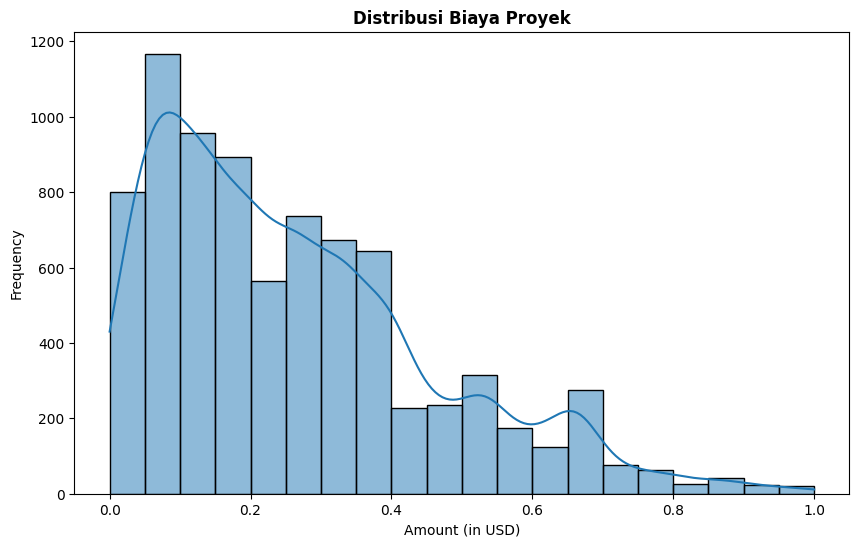

In [989]:
# Histogram variabel numerik
plt.figure(figsize=(10, 6))
sns.histplot(projects_data_cleaned['lendprojectcost'], bins=20, kde=True)
plt.title('Distribusi Biaya Proyek', fontweight='bold')
plt.xlabel('Amount (in USD)')
plt.ylabel('Frequency')
plt.show()

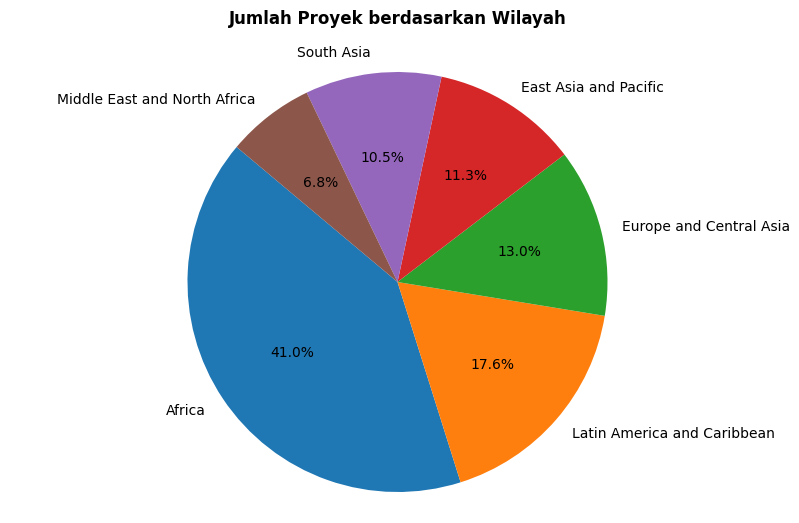

In [990]:
# Menghitung jumlah proyek berdasarkan wilayah dan mengurutkannya
region_counts = projects_data_cleaned['regionname'].value_counts().sort_values(ascending=False)

# Menghapus entri "Other" jika ada
region_counts = region_counts.drop('Other', errors='ignore')

# Membuat pie chart
plt.figure(figsize=(10, 6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Jumlah Proyek berdasarkan Wilayah', pad=20, fontweight='bold')  
plt.axis('equal')
plt.show()

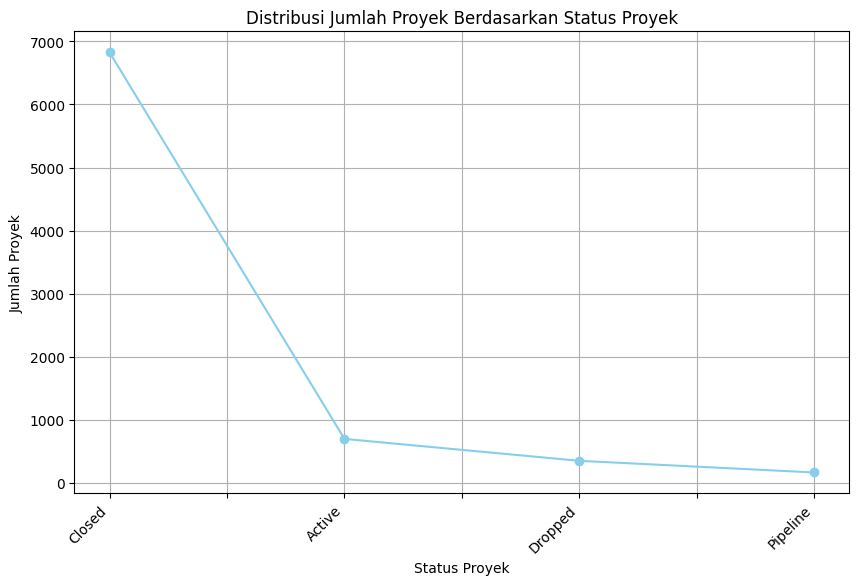

In [1028]:
# Menghitung jumlah proyek berdasarkan projectstatusdisplay
status_counts = projects_data_cleaned['projectstatusdisplay'].value_counts()

# Membuat plot diagram garis
plt.figure(figsize=(10, 6))
status_counts.plot(kind='line', marker='o', color='skyblue')
plt.title('Distribusi Jumlah Proyek Berdasarkan Status Proyek')
plt.xlabel('Status Proyek')
plt.ylabel('Jumlah Proyek')
plt.xticks(rotation=45, ha='right')
plt.grid(True)  # Menambahkan grid
plt.show()

Wilayah dengan jumlah proyek 'Closed' terbanyak adalah 'Africa' dengan total 2776 proyek.


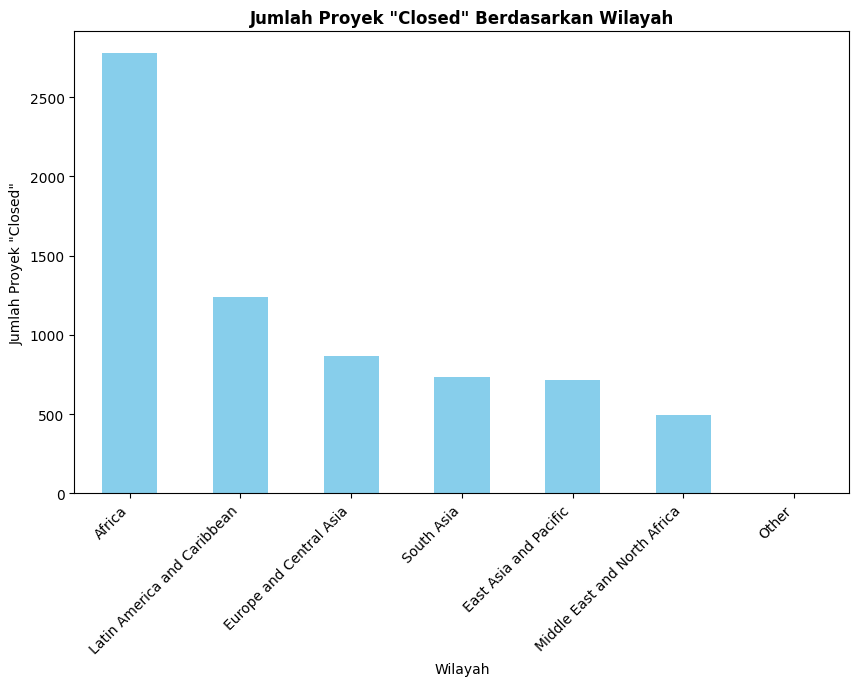

In [1031]:
# Filter data untuk hanya mencakup proyek-proyek dengan status "Closed"
closed_projects = projects_data_cleaned[projects_data_cleaned['projectstatusdisplay'] == 'Closed']

# Hitung jumlah proyek yang ada di setiap wilayah
closed_projects_by_region = closed_projects['regionname'].value_counts()

# Tampilkan wilayah dengan jumlah proyek "Closed" terbanyak
most_closed_region = closed_projects_by_region.idxmax()
num_closed_projects = closed_projects_by_region.max()

print(f"Wilayah dengan jumlah proyek 'Closed' terbanyak adalah '{most_closed_region}' dengan total {num_closed_projects} proyek.")

# Visualisasi data
plt.figure(figsize=(10, 6))
closed_projects_by_region.plot(kind='bar', color='skyblue')
plt.title('Jumlah Proyek "Closed" Berdasarkan Wilayah', fontweight='bold')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Proyek "Closed"')
plt.xticks(rotation=45, ha='right')
plt.show()

##### 2. Analisis Tren

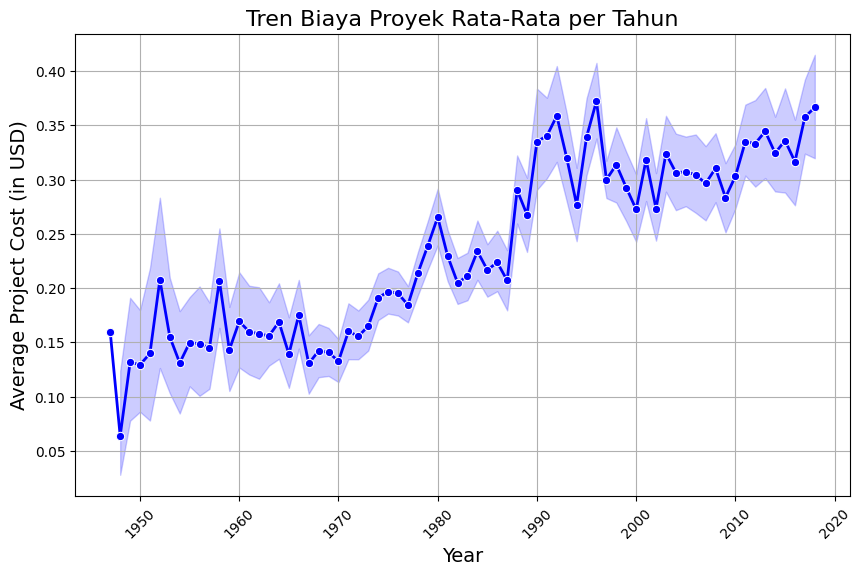

In [1032]:
# Tren lendprojectcost dari tahun ke tahun
plt.figure(figsize=(10, 6))

# Plot garis tren dengan penambahan titik
sns.lineplot(data=projects_data_cleaned, x='board_approval_year', y='lendprojectcost', estimator='mean', marker='o', color='blue', linewidth=2)

# Penambahan label dan judul
plt.title('Tren Biaya Proyek Rata-Rata per Tahun', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Project Cost (in USD)', fontsize=14)

# Penambahan grid
plt.grid(True)

# Rotasi label sumbu x
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()